<a href="https://colab.research.google.com/github/RamsesMDLC/Applied-Plotting-Charting-and-Data/blob/main/fp_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __<div class="alert alert-block alert-info"><b></b> MACHINE LEARNING PROJECT</div>__

# __<div class="alert alert-block alert-info"><b></b> RAMSES MORENO DE LA CRUZ - MMU ID: 23624012</div>__

# __0. Loading the Libraries__

In [1]:
#Manage the data
import numpy as np # linear algebra
import pandas as pd # data processing

#Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

#Visualisation (Set Configuration for Seaborn Plots)
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'

#import warnings
#warnings.filterwarnings('ignore')

#Machine Learning (Splitting the Data)
from sklearn.model_selection import train_test_split

#Machine Learning (To represent data as Pandas "dataframes" and not as Numpy "arrays" or when it is applied...
#...a transformation using sklearn function).
import sklearn
sklearn.set_config(transform_output="pandas")

#Machine Learning (Pipeline)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

#Machine Learning (Encoding / Feature Scaling / Data Cleaning)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Machine Learning (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import mean_absolute_error

#Machine Learning (KNN)
from sklearn.neighbors import KNeighborsRegressor

#Machine Learning (Tree)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree

#Machine Learning (Cross Validation / Grid Search)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

# __1. Data/Domain Understanding and Exploration__

In [8]:
data_1 = pd.read_csv("https://raw.githubusercontent.com/RamsesMDLC/PART-1---COMPLETE-SPLIT-/main/adverts-1.csv?token=GHSAT0AAAAAACLKRUKJ4JYHUPV4TVX7VFPAZLSFFTQ")
data_2 = pd.read_csv("https://raw.githubusercontent.com/RamsesMDLC/PART-2-COMPLETE-SPLIT/main/adverts-2.csv?token=GHSAT0AAAAAACLKRUKJZC7LI66WZGMJC55QZLSFFXA")
data = pd.concat([data_1, data_2], axis=0)

## __1.1. Meaning and Type of Features; Analysis of Distributions__

In [9]:
def EDA_1(data):
  #"shape" of the entire dataset
  print("\n" +'\033[1m','\033[46m',"Shape of the dataset:",'\033[0m', data.shape, "\n")

  #"head" of the entire dataset
  print('\033[1m','\033[46m',"Head of the dataset:",'\033[0m', "\n")
  print(data.head(3))

  #"tail" of the entire dataset
  print('\033[1m','\033[46m',"Tail of the dataset:",'\033[0m', "\n")
  print(data.tail(3))

  #"sample" of the entire dataset
  print('\033[1m','\033[46m',"Sample of the dataset:",'\033[0m', "\n")
  print(data.sample(n=2))

  #"general information" of the entire dataset
  print("\n", '\033[1m','\033[46m',"General information of the dataset:",'\033[0m', "\n")
  data.info()

  #"number and percentage" of the entire dataset
  print("\n" +'\033[1m','\033[46m', "Number and percentage of missing values per column of the dataset:", '\033[0m' + "\n")
  missing = data.isnull().sum()
  percentage = missing / data.shape[0] * 100
  print(pd.concat([missing, round(percentage,2)], axis=1, keys=["Missing", "Percentage %"]))

  #"summary statistics" of metric variables of the dataset
  print("\n" +'\033[1m','\033[46m', "Summary statistics of metric variables of the dataset:", '\033[0m' + "\n")
  print(data.describe())

# Call the function
EDA_1(data)


  Shape of the dataset:  (402005, 12) 

  Head of the dataset:  

   public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   

  standard_model vehicle_condition  year_of_registration  price body_type  \
0           XC90               NEW                   NaN  73970       SUV   
1             XF              USED                2011.0   7000    Saloon   
2           Yeti              USED                2017.0  14000       SUV   

   crossover_car_and_van              fuel_type  
0                  False  Petrol Plug-in Hybrid  
1                  False                 Diesel  
2                  False                 Petrol  
  Tail of the dataset:  

        public_reference  mileage reg_code standard_colour standard_make  \
200999   202010315659271  52760.0


  Countplot of some non-metric variables (standard_make): 



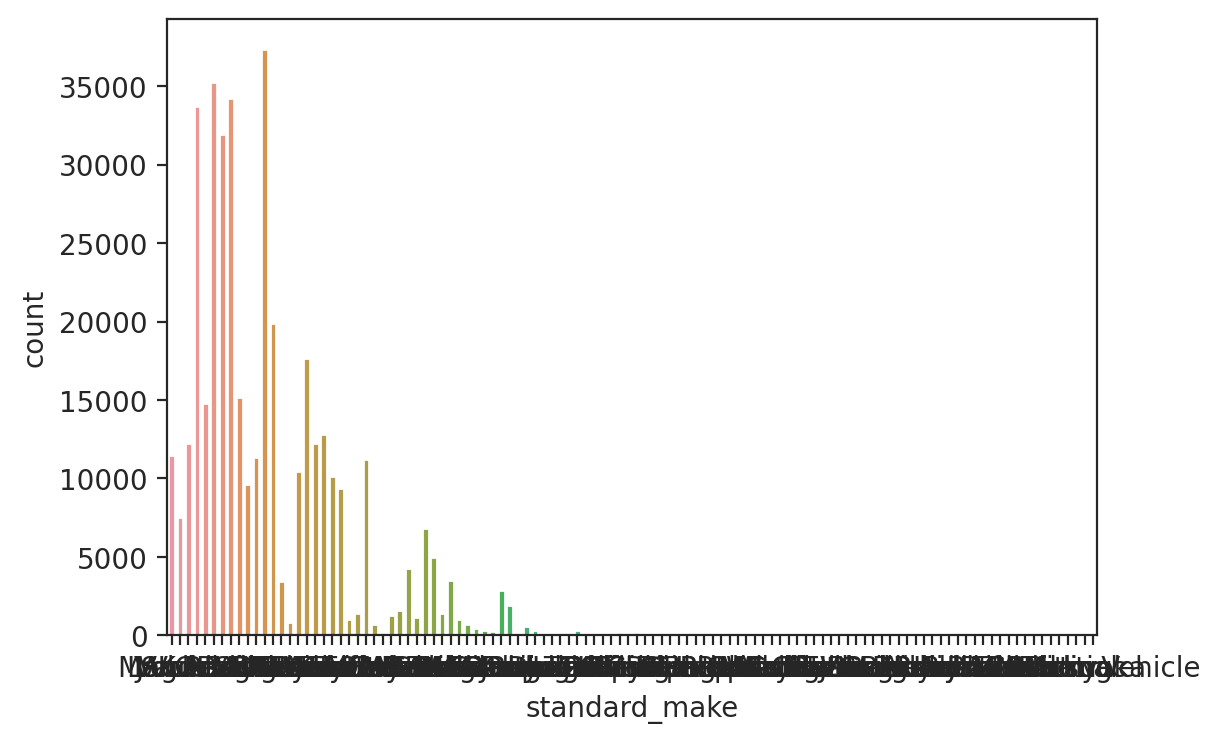


  Countplot of some non-metric variables (fuel_type): 



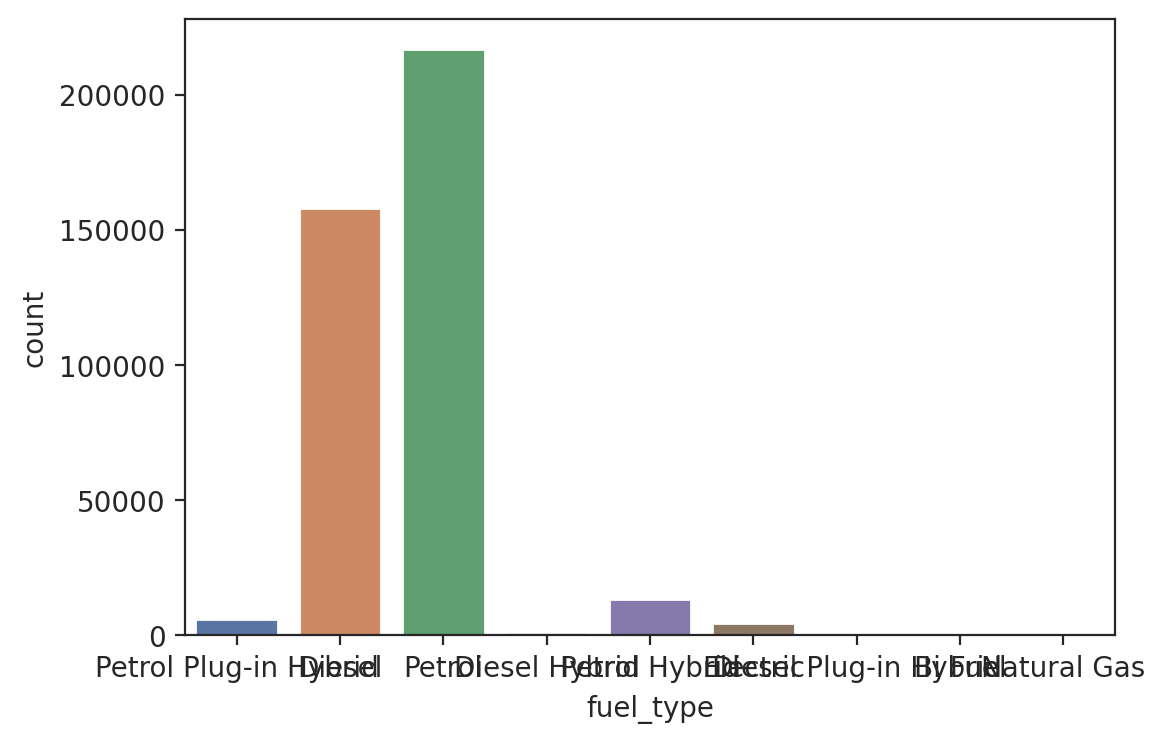


  Countplot of some non-metric variables (body_type): 



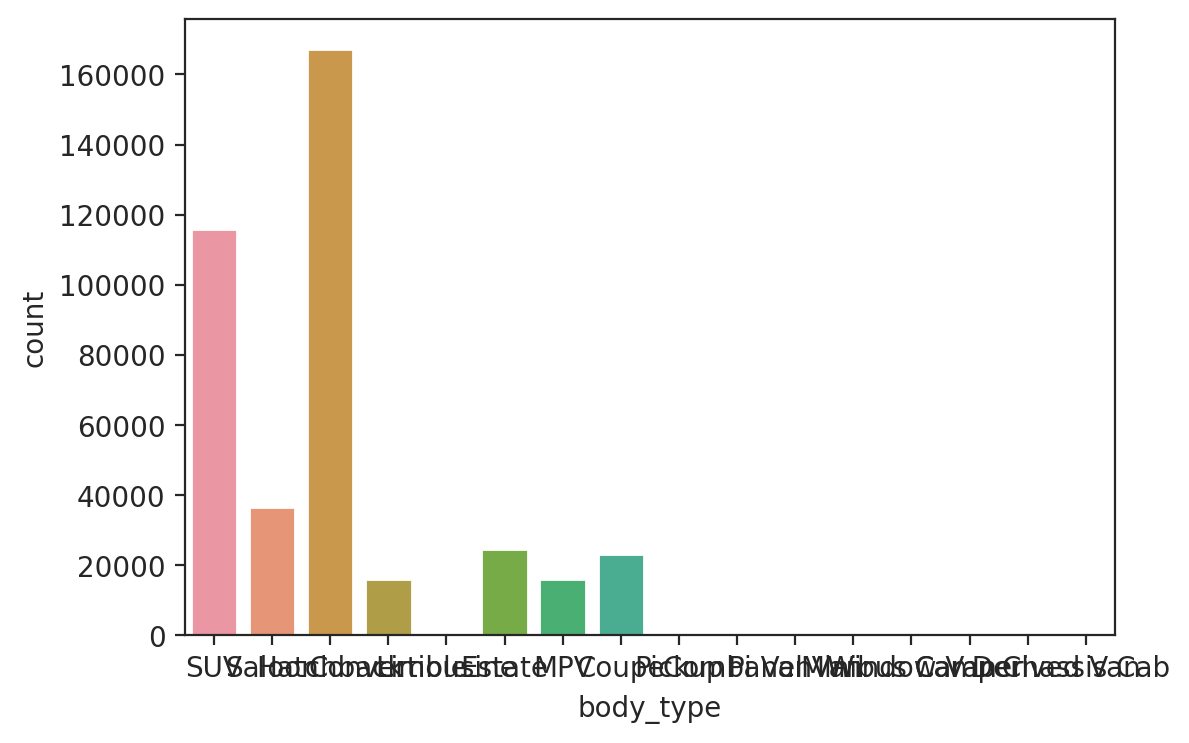

In [10]:
def EDA_Graph_1(data):

  #Countplot of some non-metric variables
  print("\n" +'\033[1m','\033[46m', "Countplot of some non-metric variables (standard_make):", '\033[0m' + "\n")
  sns.countplot(data=data, x='standard_make')
  plt.show()

  #Countplot of some non-metric variables
  print("\n" +'\033[1m','\033[46m', "Countplot of some non-metric variables (fuel_type):", '\033[0m' + "\n")
  sns.countplot(data=data, x='fuel_type')
  plt.show()

  #Countplot of some non-metric variables
  print("\n" +'\033[1m','\033[46m', "Countplot of some non-metric variables (body_type):", '\033[0m' + "\n")
  sns.countplot(data=data, x='body_type')

# Call the function
EDA_Graph_1(data)

In [ ]:
1000/4000000

In [ ]:
def EDA_Graph_2(data):

  #Histogram of some metric variables
  print("\n" +'\033[1m','\033[46m', "Histogram of some metric variables (mileage):", '\033[0m' + "\n")
  data_1 = data.query("mileage<125000")
  sns.histplot(data=data_1, x='mileage')
  plt.show()

  #Histogram of some metric variables
  print("\n" +'\033[1m','\033[46m', "Histogram of some metric variables (price):", '\033[0m' + "\n")
  data_2 = data.query("price<50000")
  sns.histplot(data=data_2, x='price')
  plt.show()

  #Histogram of some metric variables
  print("\n" +'\033[1m','\033[46m', "Histogram of some metric variables (year_of_registration):", '\033[0m' + "\n")
  data_3 = data.query("2000<=year_of_registration<=2023")
  sns.histplot(data=data_3, x='year_of_registration')
  plt.show()

  #Histogram of some metric variables
  print("\n" +'\033[1m','\033[46m', "Histogram of some metric variables (year_of_registration):", '\033[0m' + "\n")
  data_4 = data.query("1950<=year_of_registration<=2000")
  sns.histplot(data=data_4, x='year_of_registration')
  plt.show()

# Call the function
EDA_Graph_2(data)

## __1.2. Analysis of Predictive Power of Features__

In [ ]:
def EDA_2(training_data):
  #"Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the metric variables" of the dataframe
      #The code "select_dtypes" allow us to choose data points of the dataframe with specific datatypes.
          #In this case we are interested in datatypes of "int64" and "float64"
      #The output will be a "Series"
  data_metric = data.select_dtypes(include=['int64',"float64"])
  corr_Pearson_matrix = data_metric.corr()
  corr_Pearson_serie = corr_Pearson_matrix["price"].sort_values(ascending=False)

  #"Spearman's Rank Correlation Coefficient of the metric variables" of the dataframe
      #The output will be a "Series"
  corr_Spearman_matrix = data_metric.corr(method="spearman")
  corr_Spearman_serie = corr_Spearman_matrix["price"].sort_values(ascending=False)

  # Print the dataframe to contrast the "Pearson's Correlation Coefficient" vs "Spearman's Rank Correlation Coefficient on metric variables"
    #Transforming the Series to a Dataframe
    #Reseting the index of the dataframes
    #Changing the head of the dataframes
    #Concatenate the dataframes
  corr_Pearson_df = pd.DataFrame(corr_Pearson_serie)
  corr_Spearman_df = pd.DataFrame(corr_Spearman_serie)

  corr_Pearson_df.reset_index(inplace=True)
  corr_Spearman_df.reset_index(inplace=True)

  corr_Pearson_df = corr_Pearson_df.rename(columns = {"index":"Metric Variable","Price":"Pearson Correlation"})
  corr_Spearman_df = corr_Spearman_df.rename(columns = {"index":"Metric Variable","Price":"Spearman Correlation"})

  print("\n" +'\033[1m','\033[46m', "Pearson Coefficient vs Spearman Correlation Coefficient", '\033[0m' + "\n")
  corr_compare_df = pd.concat([corr_Pearson_df, corr_Spearman_df], axis=1)
  print(corr_compare_df.head())

# Call the function
EDA_2(data)

## __1.3. Data Processing for Data Exploration and Visualisation__

# __2. Data Processing for Machine Learning__

## __2.1. Dealing with Missing Values, Outliers, and Noise__

# __Splitting the data__

In [ ]:
X = data.drop(columns='price')
Y = data['price']

In [ ]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20, random_state=42)

#metric variables / non-metric variables
metric = ['year_of_registration', 'public_reference', 'mileage']
non_metric = ["reg_code", "standard_colour", "standard_make", "standard_model", "vehicle_condition", "body_type", "crossover_car_and_van", "fuel_type"]

#Training Set
    #metric variables / non-metric variables
metric_train = X_train[metric]
non_metric_train = X_train[non_metric]

#Test Set
    #metric variables / non-metric variables
metric_test = X_test[metric]
non_metric_test = X_test[non_metric]

# __Pipeline Training Set and Test Set__

In [ ]:
#Pipeline 1 (metric variables)
metric_var_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", MinMaxScaler())])

#Pipeline 2(non-metric variables)
    #handle_unknown = "ignore" (values in the column 0, 2, and 3 of the test set were transformed to "zero" using one-hot encoding)
    #Maybe, it is useful to estimate how many values were strange, how I dealt with them and put that on the report.
non_metric_var_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("encoder", OneHotEncoder(sparse_output=False, drop='if_binary',handle_unknown = "ignore"))])

#Pipeline 3 (Pipeline 1 + Pipeline 2)
var_transformer = ColumnTransformer(transformers=[("metric", metric_var_transformer, metric),("non-metric", non_metric_var_transformer, non_metric)])

In [ ]:
#Applying transformations of "Pipeline 3" to the training set
var_transformer.fit_transform(X_train)

In [ ]:
#Applying transformations of "Pipeline 3" to the test set
var_transformer.transform(X_test)

# __Linear Regression__

In [ ]:
#Pipeline 4.1 (Pipeline 3 + Machine Learning Model [Linear Regression )
lin_regression = Pipeline(steps=[("transforming data", var_transformer),("lin_regression", LinearRegression())])
lin_regression.fit(X_train[0:1000], Y_train[0:1000])

#Model Evaluation (Coarse Grained)
    #Aggregate Score
        #Score: amount of variance of the target explained by the model
        #The best possible R^2 is 1.0
        #Represents the proportion of the variance (i.e. variability) in the dependent variable which is explained by the linear regression model.
print("\n" +'\033[1m','\033[46m', "Linear Regression - Score (also called Coefficient of Determination R^2) for Training Set", '\033[0m' + "\n")
print(lin_regression.score(X_train[0:1000], Y_train[0:1000]))
print("\n" +'\033[1m','\033[46m', "Linear Regression - Score (also called Coefficient of Determination R^2) for Test Set", '\033[0m' + "\n")
print(lin_regression.score(X_test[0:1000], Y_test[0:1000]))

#Model Evaluation (Coarse Grained)
    #Aggregate Loss
        #Loss: the average residual value (here, price in £)
print(mean_absolute_error(Y_train[0:1000], lin_regression.predict(X_train[0:1000])))
print(mean_absolute_error(Y_test[0:1000], lin_regression.predict(X_test[0:1000])))

In [ ]:
#Model Analysis
    #Actual vs Predicted
PredictionErrorDisplay.from_estimator(lin_regression, X[0:1000], Y[0:1000], kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5))

In [ ]:
PredictionErrorDisplay.from_estimator(lin_regression, X[0:1000], Y[0:1000], kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5));

In [ ]:
residuals = lin_regression.predict(X[0:100]) - Y[0:100]
sns.histplot(residuals)

# __KNN__

In [ ]:
#Pipeline 4.2 (Pipeline 3 + Machine Learning Model [KNN] )
knn_regression = Pipeline(steps=[("transforming data", var_transformer),("knn_regression", KNeighborsRegressor(n_neighbors=15))])
knn_regression.fit(X_train[0:1000], Y_train[0:1000])

#Model Evaluation (Coarse Grained)
    #Aggregate Score
        #Score: amount of variance of the target explained by the model
print(knn_regression.score(X_train[0:1000], Y_train[0:1000]))
print(knn_regression.score(X_test[0:1000], Y_test[0:1000]))

#Model Evaluation (Coarse Grained)
    #Aggregate Loss
        #Loss: the average residual value (here, price in £)
print(mean_absolute_error(Y_train[0:1000], knn_regression.predict(X_train[0:1000])))
print(mean_absolute_error(Y_test[0:1000], knn_regression.predict(X_test[0:1000])))

In [ ]:
#Model Analysis
    #Actual vs Predicted
PredictionErrorDisplay.from_estimator(knn_regression, X[0:1000], Y[0:1000], kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5))

In [ ]:
PredictionErrorDisplay.from_estimator(knn_regression, X[0:1000], Y[0:1000], kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5));

In [ ]:
residuals = knn_regression.predict(X[0:1000]) - Y[0:1000]
sns.histplot(residuals)

# __Tree__

In [ ]:
#Pipeline 4.3 (Pipeline 3 + Machine Learning Model [Tree] )
tree_regression = Pipeline(steps=[("transforming data", var_transformer),("tree_regression", DecisionTreeRegressor(max_depth=6))])
tree_regression.fit(X_train[0:1000], Y_train[0:1000])

#Model Evaluation (Coarse Grained)
    #Aggregate Score
        #Score: amount of variance of the target explained by the model
print(tree_regression.score(X_train[0:1000], Y_train[0:1000]))
print(tree_regression.score(X_test[0:1000], Y_test[0:1000]))

#Model Evaluation (Coarse Grained)
    #Aggregate Loss
        #Loss: the average residual value (here, price in £)
print(mean_absolute_error(Y_train[0:1000], tree_regression.predict(X_train[0:1000])))
print(mean_absolute_error(Y_test[0:1000], tree_regression.predict(X_test[0:1000])))

#Cross Validation (Trainind Data)
tree_scores = cross_val_score(tree_regression, X_train[0:1000], Y_train[0:1000], cv=5)
print(tree_scores.mean())
print(tree_scores.std())

# __3. Model Building__

## __3.1. Algorithm Selection, Model Instantiation and Configuration__

## __3.2. Grid Search, and Model Ranking and Selection__

# __4. Model Evaluation and Analysis__

## __4.1. Coarse-Grained Evaluation/Analysis (e.g., with model scores)__